Social Good Recommendation System

Team - C
Members: Ajay Valecha, Prasun Srestha, Premkumar Loganathan

# Initialization codes & loading data

In [ ]:
# Import libraries

# Data wrangling libraries
import pandas as pd
import numpy as np
import random as rnd

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Pre-processing

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# ML models 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# pip install varname


In [ ]:
# Set Display parameters

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
pd.set_option('display.max_rows', 500)



In [2]:
# Loading the dataset 
df_donors_raw = pd.read_csv('Donors.csv')
df_donations_raw = pd.read_csv('Donations.csv')
df_projects_raw = pd.read_csv('Projects.csv')
df_resources_raw = pd.read_csv('Resources.csv')
df_schools_raw = pd.read_csv('Schools.csv')
df_teachers_raw = pd.read_csv('Teachers.csv')
df_zip_raw = pd.read_csv('US Zip Codes from 2013 Government Data.csv')


# Exploratory Data Analysis

## Data Summary

### Donor data

In [ ]:
df_donors_raw.head()

In [ ]:
df_donors_raw.describe(include=['object']).transpose()

### Donations data

In [ ]:
df_donations_raw.head()

In [ ]:
# Distribution of all int and float variables
df_donations_raw.describe(include=['int64','float']).transpose()

In [ ]:
df_donations_raw.describe(include=['object']).transpose()

### Projects data 

In [ ]:
df_projects_raw.head()

In [ ]:
# Distribution of all int and float variables
df_projects_raw.describe(include=['int64','float']).transpose()

In [ ]:
df_projects_raw.describe(include=['object']).transpose()

### Resources data

In [ ]:
df_resources_raw.head()

In [ ]:
# Distribution of all int and float variables
df_resources_raw.describe(include=['int64','float']).transpose()

In [ ]:
df_resources_raw.describe(include=['object']).transpose()

### Schools data

In [ ]:
df_schools_raw.head()

In [ ]:
# Distribution of all int and float variables
df_schools_raw.describe(include=['int64','float']).transpose()

In [ ]:
df_schools_raw.describe(include=['object']).transpose()

### Teachers data

In [ ]:
df_teachers_raw.head()

In [ ]:
df_teachers_raw.describe(include=['object']).transpose()

### Zip data

In [ ]:
df_zip_raw.head()

## Missing data

In [ ]:
dataframes_list = [df_donors_raw,df_donations_raw,df_projects_raw,df_resources_raw,df_schools_raw,df_teachers_raw]
dataframes_names = ["df_donors_raw","df_donations_raw","df_projects_raw","df_resources_raw","df_schools_raw","df_teachers_raw"]
for i in range(0,len(dataframes_list)):
    # Count of missing values as percentage of total data
    total = dataframes_list[i].isnull().sum().sort_values(ascending=False)
    percent =round(((dataframes_list[i].isnull().sum()/dataframes_list[i].isnull().count())*100),2).sort_values(ascending=False)
    columns_series = dataframes_list[i].columns.to_series()

    missing_data_summary_df = pd.concat([columns_series,total, percent],axis = 1, keys=['Column_Names','Total', 'Percent'])
    missing_data_summary_df.sort_values(['Percent'], inplace = True, ascending=False)
    missing_data_summary_df.reset_index(drop=True, inplace=True)
    print("\nMissing data in {}:\n".format(dataframes_names[i]))
    print("Length of Dataframe {}: {}\n".format(dataframes_names[i],len(dataframes_list[i])))
    print(missing_data_summary_df)

## Univariate analysis - Table wise 

### Donors

In [59]:
t1 = df_donations_raw['Donor ID'].value_counts().rename_axis('unique_values').reset_index(name='counts')
t2 = t1["counts"].value_counts().rename_axis('No_of_donations').reset_index(name='No_of_donors')
#t2['No_of_donations'] = t2['No_of_donations'].astype(str)
t2['Percent'] = round((100 * t2['No_of_donors'] / t2['No_of_donors'].sum()),2)
freq_donation_table = t2[:6]

In [57]:
freq_donation_table

,No_of_donations,No_of_donors,Percent
0,1,1471613,72.69
1,2,274902,13.58
2,3,99063,4.89
3,4,49911,2.47
4,5,30578,1.51
5,6,19665,0.97


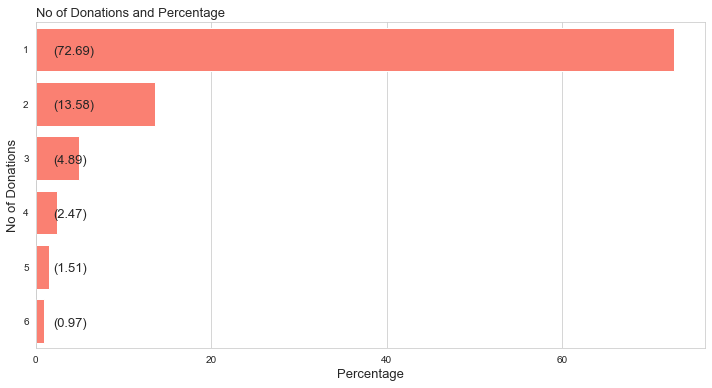

In [95]:
sns.axes_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 20})
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Percent", y="No_of_donations",color="salmon", saturation=1, orient="h", data=freq_donation_table)
ax.set_xlabel("Percentage", size = 13)
ax.set_ylabel("No of Donations", size = 13)
ax.set_title("No of Donations and Percentage", size = 13, loc = 'left')
ax.set_xticks(ticks =(0,20,40,60))
for p in ax.patches:
    width = p.get_width()
    plt.text(2, p.get_y()+0.55*p.get_height(),
             '({:1.2f})'.format(width),size = 13,
             ha='left', va='center')

#for p in ax.patches:
 #   width = p.get_width()
  #  plt.text(2+p.get_width(), p.get_y()+0.55*p.get_height(),
   #          '({:1.2f})'.format(width),
    #         ha='left', va='center')

### Donations

In [ ]:
df_donations_raw.head()

### Projects

In [ ]:
df_projects_raw.head(1)

In [ ]:
# Percentage of projects funded/not funded
df1 = df_projects_raw['Project Current Status'].value_counts(normalize = True) * 100

In [ ]:
df1.plot(kind="bar",cmap='Oranges_r');
plt.xlabel('Project Status');
plt.ylabel('Percentage');
plt.title("Completion status of projects");

### Resources

### Schools

### Teachers